"What is the influence of Math Program on student outcomes? Specifically, how does 
Quantile growth of students who used Math Program compare to growth of students who 
did not use the program?"

In [2]:
# Influence of  Math Program on student outcomes
# Importing the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loding the two datsets into pandas dataframe
df_assessment= pd.read_csv("2_students_assessments.csv") 
df_usage = pd.read_csv("3_students_usage.csv")

#### Analyzing the student assessment data

In [4]:
#checking the first few rows of assesment data 
df_assessment.head(10)

,internal_student_id,grade_level_number,audio_support_language_me,is_ell,is_sped,Benchmark_1.benchmark_type,Benchmark_1.local_completed_at,Benchmark_1.local_started_at,Benchmark_1.nce,Benchmark_1.num_correct,...,Benchmark_2.rounded_quantile,Benchmark_3.benchmark_type,Benchmark_3.local_completed_at,Benchmark_3.local_started_at,Benchmark_3.nce,Benchmark_3.num_correct,Benchmark_3.num_possible,Benchmark_3.percentile,Benchmark_3.quantile,Benchmark_3.rounded_quantile
0,18555442,6,NaN,False,False,MM Placement Test,9/4/2018,8/31/2018 17:33,10,12,...,335,MM Benchmark,5/20/2019,5/20/2019 12:47,10,13,30,3,345,345
1,18555489,6,NaN,False,False,MM Placement Test,9/7/2018,8/31/2018 15:15,13,9,...,390,MM Benchmark,5/20/2019,5/20/2019 12:49,7,10,30,2,315,315
2,18557546,6,NaN,NaN,False,MM Placement Test,9/7/2018,8/31/2018 18:27,17,10,...,250,MM Benchmark,5/21/2019,5/21/2019 12:49,1,13,30,1,239,240
3,18557837,6,NaN,NaN,False,MM Placement Test,9/7/2018,9/4/2018 12:55,26,13,...,235,MM Benchmark,5/20/2019,5/20/2019 12:43,10,22,30,3,353,355
4,18557915,6,NaN,NaN,False,MM Placement Test,9/4/2018,9/4/2018 12:49,7,8,...,485,MM Benchmark,5/20/2019,5/20/2019 12:43,24,13,30,11,514,515
5,18562434,3,NaN,NaN,False,MM Placement Test,8/23/2018,8/23/2018 17:26,17,14,...,-30,MM Benchmark,5/9/2019,5/9/2019 18:06,1,11,30,1,-24,-25
6,18562444,3,NaN,NaN,False,MM Placement Test,8/28/2018,8/23/2018 14:29,51,20,...,430,MM Benchmark,5/21/2019,5/21/2019 17:47,43,14,30,36,436,435
7,18562479,3,NaN,NaN,False,MM Placement Test,8/22/2018,8/21/2018 17:43,31,16,...,380,MM Benchmark,5/9/2019,5/9/2019 14:31,45,17,30,41,460,460
8,18562482,3,NaN,NaN,False,MM Placement Test,8/28/2018,8/28/2018 17:24,40,17,...,500,MM Benchmark,5/10/2019,5/10/2019 14:07,41,12,30,34,425,425
9,18562510,3,NaN,False,False,MM Placement Test,8/30/2018,8/27/2018 14:51,40,18,...,360,MM Benchmark,5/16/2019,5/6/2019 13:05,37,16,30,27,387,385


In [5]:
#Getting the dimensions of the Dataframe 
df_assessment.shape
print("This data set consists of {} rows and {} columns".format(df_assessment.shape[0], df_assessment.shape[1]))

This data set consists of 127356 rows and 32 columns


In [6]:
# Display information about the df_assessment DataFrame such as number of rows, columns, column names, and data types
# as well as the number of non-null values in each column
df_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127356 entries, 0 to 127355
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   internal_student_id             127356 non-null  int64 
 1   grade_level_number              127356 non-null  int64 
 2   audio_support_language_me       18640 non-null   object
 3   is_ell                          30500 non-null   object
 4   is_sped                         127356 non-null  bool  
 5   Benchmark_1.benchmark_type      127356 non-null  object
 6   Benchmark_1.local_completed_at  127356 non-null  object
 7   Benchmark_1.local_started_at    127356 non-null  object
 8   Benchmark_1.nce                 127356 non-null  int64 
 9   Benchmark_1.num_correct         127356 non-null  int64 
 10  Benchmark_1.num_possible        127356 non-null  int64 
 11  Benchmark_1.percentile          127356 non-null  int64 
 12  Benchmark_1.quantile          

#### Observations
- 'audio_support_language_me' and 'is_ell' columns have missing values.
- Most of the columns are of integer or object type.
- The columns 'Benchmark_1.local_started_at' , 'Benchmark_1.local_completed_at' and similar columns for other benchmarks have a data type of object, which means they are currently stored as strings and needs to be converted to datetime format.

In [7]:
#checking for duplicates 
print("There are {} duplicate Values".format(df_assessment.duplicated().sum()))

There are 71 duplicate Values


In [8]:
#deleting Duplicate values
df_assessment.drop_duplicates(inplace =True)

In [9]:
#checking the data set after deleting duplicate values
df_assessment.shape
print("This data set consists of {} rows and {} columns after deleting duplicate values".format(df_assessment.shape[0], df_assessment.shape[1]))

This data set consists of 127285 rows and 32 columns after deleting duplicate values


In [10]:
#checking for the number of duplicated values in the 'internal_student_id' column
df_assessment['internal_student_id'].duplicated().sum() 

0

In [11]:
# Creating a list of date columns
date_columns = ['Benchmark_1.local_completed_at','Benchmark_1.local_started_at','Benchmark_2.local_completed_at',\
               'Benchmark_2.local_started_at','Benchmark_3.local_completed_at','Benchmark_3.local_started_at']

# Converting each date column to datetime format
for i in date_columns:
    df_assessment[i]=pd.to_datetime(df_assessment[i])

In [12]:
# Checking data types of all columns after converting date columns to datetime format
df_assessment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127285 entries, 0 to 127355
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   internal_student_id             127285 non-null  int64         
 1   grade_level_number              127285 non-null  int64         
 2   audio_support_language_me       18623 non-null   object        
 3   is_ell                          30500 non-null   object        
 4   is_sped                         127285 non-null  bool          
 5   Benchmark_1.benchmark_type      127285 non-null  object        
 6   Benchmark_1.local_completed_at  127285 non-null  datetime64[ns]
 7   Benchmark_1.local_started_at    127285 non-null  datetime64[ns]
 8   Benchmark_1.nce                 127285 non-null  int64         
 9   Benchmark_1.num_correct         127285 non-null  int64         
 10  Benchmark_1.num_possible        127285 non-null  int64  

In [13]:
# Calculate the percentage of missing values in each column and sort in descending order

(df_assessment.isna().mean()*100).sort_values(ascending =False) # Here the columns audio_support_language_me,is_ell have more percentage of missing values 

audio_support_language_me         85.369054
is_ell                            76.038025
internal_student_id                0.000000
Benchmark_3.local_completed_at     0.000000
Benchmark_2.num_possible           0.000000
Benchmark_2.percentile             0.000000
Benchmark_2.quantile               0.000000
Benchmark_2.rounded_quantile       0.000000
Benchmark_3.benchmark_type         0.000000
Benchmark_3.nce                    0.000000
Benchmark_3.local_started_at       0.000000
Benchmark_2.nce                    0.000000
Benchmark_3.num_correct            0.000000
Benchmark_3.num_possible           0.000000
Benchmark_3.percentile             0.000000
Benchmark_3.quantile               0.000000
Benchmark_2.num_correct            0.000000
Benchmark_2.local_started_at       0.000000
grade_level_number                 0.000000
Benchmark_2.local_completed_at     0.000000
Benchmark_2.benchmark_type         0.000000
Benchmark_1.rounded_quantile       0.000000
Benchmark_1.quantile            

we can observe that two columns - audio_support_language_me and is_ell - have a high percentage of missing values. The former has 85.37% missing values and the latter has 76.04% missing values. 

In [14]:
# Checking the value counts of the 'audio_support_language_me' column, including NaN values
df_assessment.audio_support_language_me.value_counts(dropna=False) 


NaN    108662
es      17440
en       1183
Name: audio_support_language_me, dtype: int64

In [15]:
# Checking the value counts of the 'is_ell' column, including NaN values
df_assessment.is_ell.value_counts(dropna=False)
#'is_ell'-If the customer specified the student as being an ELL student or not


NaN      96785
False    30426
True        74
Name: is_ell, dtype: int64

In [16]:
# dropping columns with too many missing values
# these columns are dropped as they have a high percentage of missing values and won't be useful for the analysis
df_assessment.drop(columns =['audio_support_language_me','is_ell'],inplace=True)

In [17]:
# Using the `describe()` method to generate summary statistics of the df_assessment,
# and rounding the values to 2 decimal places using the `apply()` method with
# the `round()` function. Then transposing the result to display the statistics.
df_assessment.describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
internal_student_id,127285.0,19591796.02,434451.66,18555442.0,19278339.0,19632195.0,19952433.0,20811302.0
grade_level_number,127285.0,4.80,1.93,2.0,3.0,5.0,6.0,10.0
Benchmark_1.nce,127285.0,34.13,22.72,0.0,17.0,33.0,48.0,99.0
Benchmark_1.num_correct,127285.0,15.98,4.34,1.0,13.0,16.0,19.0,30.0
Benchmark_1.num_possible,127285.0,30.00,0.00,30.0,30.0,30.0,30.0,30.0
Benchmark_1.percentile,127285.0,30.01,27.94,0.0,6.0,21.0,47.0,99.0
Benchmark_1.quantile,127285.0,445.83,291.99,-664.0,254.0,415.0,635.0,1755.0
Benchmark_1.rounded_quantile,127285.0,445.91,291.29,-400.0,255.0,415.0,635.0,1485.0
Benchmark_2.nce,127285.0,35.97,22.88,0.0,19.0,37.0,52.0,99.0
Benchmark_2.num_correct,127285.0,17.44,5.21,1.0,14.0,18.0,21.0,30.0


#### Observations

- The mean of rounded quantile of Benchmark_3 is more than the Benchmark_2 and Benchmark_1.
- From the standard deviations of the three bench mark roundeded quantiles it can be said that the data is more spread out.
- There is a significant difference between the 75th percentile and maximum value indicating that there are potential outliers in the data.



To answer the research question "What is the impact of  Math Program  on student outcomes, specifically on the growth of students' Quantile scores compared to those who did not use the program?", the analysis should be based on the Quantile scores earned by the students.
To perform the analysis, it is important to understand the difference between the rounded quantiles and quantiles.

In [18]:
#Selecting the subset of data where grade level number is 2 and computing the descriptive statistics
df_assessment[df_assessment['grade_level_number'] ==2].describe().T

,count,mean,std,min,25%,50%,75%,max
internal_student_id,13093.0,1.996143e+07,234796.922516,18903810.0,19741704.0,19942186.0,20182306.0,20811302.0
grade_level_number,13093.0,2.000000e+00,0.000000,2.0,2.0,2.0,2.0,2.0
Benchmark_1.nce,13093.0,1.512258e-02,0.605694,0.0,0.0,0.0,0.0,38.0
Benchmark_1.num_correct,13093.0,1.879623e+01,3.806425,5.0,16.0,19.0,22.0,29.0
Benchmark_1.num_possible,13093.0,3.000000e+01,0.000000,30.0,30.0,30.0,30.0,30.0
Benchmark_1.percentile,13093.0,7.790422e-03,0.382476,0.0,0.0,0.0,0.0,29.0
Benchmark_1.quantile,13093.0,1.642446e+02,201.312494,-528.0,35.0,151.0,283.0,858.0
Benchmark_1.rounded_quantile,13093.0,1.644810e+02,200.450188,-400.0,35.0,150.0,285.0,725.0
Benchmark_2.nce,13093.0,2.818300e-02,0.839222,0.0,0.0,0.0,0.0,33.0
Benchmark_2.num_correct,13093.0,1.669717e+01,5.153274,1.0,13.0,17.0,21.0,30.0


In [19]:
#Selecting rows where grade level number is 2 and Benchmark_2.quantile is greater than 690
#and displaying only the columns 'Benchmark_2.quantile' and 'Benchmark_2.rounded_quantile'
df_assessment[(df_assessment['grade_level_number'] ==2) & (df_assessment['Benchmark_2.quantile']\
                                                           >690)][['Benchmark_2.quantile','Benchmark_2.rounded_quantile']].head(10)

,Benchmark_2.quantile,Benchmark_2.rounded_quantile
69414,694,695
69565,812,725
69720,722,720
69723,736,725
69763,698,700
69791,739,725
69837,697,695
69845,693,695
69852,740,725
69854,704,705


In [20]:
#For Grade 3 statistics
df_assessment[df_assessment.grade_level_number ==3].describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
internal_student_id,25536.0,19554367.26,439883.13,18562434.0,19319286.75,19542652.0,19863100.75,20684197.0
grade_level_number,25536.0,3.00,0.00,3.0,3.00,3.0,3.00,3.0
Benchmark_1.nce,25536.0,33.60,17.13,0.0,22.00,32.0,45.00,99.0
Benchmark_1.num_correct,25536.0,17.17,3.78,3.0,15.00,17.0,20.00,30.0
Benchmark_1.num_possible,25536.0,30.00,0.00,30.0,30.00,30.0,30.00,30.0
Benchmark_1.percentile,25536.0,26.66,22.28,0.0,9.00,19.0,41.00,99.0
Benchmark_1.quantile,25536.0,223.75,167.41,-664.0,116.00,218.0,340.00,1029.0
Benchmark_1.rounded_quantile,25536.0,223.97,167.01,-400.0,115.00,220.0,340.00,975.0
Benchmark_2.nce,25536.0,36.53,17.78,0.0,24.00,37.0,49.00,99.0
Benchmark_2.num_correct,25536.0,18.64,5.21,2.0,15.00,19.0,23.00,30.0


In [21]:
# For Grade 3
df_assessment[(df_assessment['grade_level_number'] ==3) & (df_assessment['Benchmark_2.quantile']\
                                                           >1000)][['Benchmark_2.quantile','Benchmark_2.rounded_quantile']]

,Benchmark_2.quantile,Benchmark_2.rounded_quantile
25008,1049,975
40838,1027,975
122361,1058,975


The maximum rounded Quantile for grade 3 students is 975 

In [22]:
#For Grade 4 statistics
df_assessment[df_assessment.grade_level_number ==4].describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
internal_student_id,24662.0,19566719.43,415581.54,18567337.0,19346481.25,19577863.0,19878950.25,20674879.0
grade_level_number,24662.0,4.00,0.00,4.0,4.00,4.0,4.00,4.0
Benchmark_1.nce,24662.0,31.56,16.43,0.0,20.00,30.0,43.00,99.0
Benchmark_1.num_correct,24662.0,15.56,3.57,4.0,13.00,15.0,18.00,30.0
Benchmark_1.num_possible,24662.0,30.00,0.00,30.0,30.00,30.0,30.00,30.0
Benchmark_1.percentile,24662.0,24.01,20.98,0.0,8.00,17.0,37.00,99.0
Benchmark_1.quantile,24662.0,343.06,165.73,-431.0,254.00,340.0,458.00,1230.0
Benchmark_1.rounded_quantile,24662.0,343.27,165.31,-400.0,255.00,340.0,460.00,1075.0
Benchmark_2.nce,24662.0,37.07,18.51,0.0,25.00,37.0,48.00,99.0
Benchmark_2.num_correct,24662.0,18.91,5.19,2.0,15.00,19.0,23.00,30.0


In [23]:
# For Grade 4
df_assessment[(df_assessment['grade_level_number'] ==4) & (df_assessment['Benchmark_2.quantile']\
                                                           >1000)][['Benchmark_2.quantile','Benchmark_2.rounded_quantile']].head(10)

,Benchmark_2.quantile,Benchmark_2.rounded_quantile
22990,1043,1045
24352,1131,1075
26203,1023,1025
26512,1031,1030
40937,1210,1075
41111,1045,1045
41356,1037,1035
41363,1043,1045
41453,1215,1075
41456,1012,1010


#### observations

- For grade 2 students, the quantiles above 725 are rounded down to 725, and anything below is rounded to the nearest value.
- For grade 3 students, quantiles above 975 are rounded down to 975, and anything below is rounded to the nearest value.
- For grade 4 students, quantiles above 1075 are rounded down to 1075, and anything below is rounded to the nearest value.

Based on these observations, it seems reasonable to consider using the rounded quantiles rather than the exact quantiles in our analysis.


In [24]:
# Selecting relevant columns for analysis
col_analysis = ['internal_student_id','grade_level_number','Benchmark_1.rounded_quantile','Benchmark_2.rounded_quantile',\
                'Benchmark_3.rounded_quantile']
# Creating a new dataframe with selected columns
df_assess = df_assessment[col_analysis]

In [25]:
#checking the filtered data set again  
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127285 entries, 0 to 127355
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   internal_student_id           127285 non-null  int64
 1   grade_level_number            127285 non-null  int64
 2   Benchmark_1.rounded_quantile  127285 non-null  int64
 3   Benchmark_2.rounded_quantile  127285 non-null  int64
 4   Benchmark_3.rounded_quantile  127285 non-null  int64
dtypes: int64(5)
memory usage: 5.8 MB


#### Analyzing the student Usage data

In [26]:
#checking the first few rows of Usage data 
df_usage.head(10)

,internal_student_id,total_hours,total_evening_hours,problems_solved,problems_passed,points_awarded,hints_viewed,live_help_count,lessons_hit,lessons_tested_out,lessons_worked,lessons_worked_passed
0,18549902,28.914167,0.000000,2656,1034,18611,5,0,73.0,2.0,71.0,10.0
1,18549903,56.483611,2.005556,4040,2879,156589,98,0,218.0,97.0,121.0,93.0
2,18549904,48.281944,0.000000,3270,1727,52868,47,0,115.0,16.0,99.0,39.0
3,18549905,34.383889,1.233611,1366,886,38316,31,2,58.0,16.0,42.0,32.0
4,18549906,50.940833,0.000000,3723,2344,78989,127,1,146.0,22.0,124.0,74.0
5,18549907,43.461667,0.968611,4612,2075,47442,31,0,145.0,9.0,136.0,41.0
6,18549908,50.155278,1.487778,4352,2263,65916,113,0,155.0,22.0,133.0,52.0
7,18549909,46.660556,1.373333,3373,1954,69630,69,0,132.0,28.0,104.0,61.0
8,18549910,42.712500,0.000000,5644,1827,21570,61,1,140.0,0.0,140.0,9.0
9,18549911,58.558333,0.981667,2276,1598,83938,129,0,118.0,47.0,71.0,57.0


In [27]:
#Getting the dimensions of the Dataframe 
df_usage.shape
print("This data set consists of {} rows and {} columns".format(df_usage.shape[0], df_usage.shape[1]))

This data set consists of 633120 rows and 12 columns


In [28]:
# Displaying information about the DataFrame
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633120 entries, 0 to 633119
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   internal_student_id    633120 non-null  int64  
 1   total_hours            633120 non-null  float64
 2   total_evening_hours    633120 non-null  float64
 3   problems_solved        633120 non-null  int64  
 4   problems_passed        633120 non-null  int64  
 5   points_awarded         633120 non-null  int64  
 6   hints_viewed           633120 non-null  int64  
 7   live_help_count        633120 non-null  int64  
 8   lessons_hit            583683 non-null  float64
 9   lessons_tested_out     583683 non-null  float64
 10  lessons_worked         583683 non-null  float64
 11  lessons_worked_passed  583683 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 58.0 MB


#### Observations
- The 'internal_student_id', 'total_hours', 'total_evening_hours', 'problems_solved', 'problems_passed', 'points_awarded', 'hints_viewed', 'live_help_count' columns have 633120 non-null values.
- The 'lessons_hit', 'lessons_tested_out', 'lessons_worked', 'lessons_worked_passed' columns have null values.
- The data types of the columns are float64 (6 columns) and int64 (6 columns).


In [29]:
#checking for duplicates 
print("There are {} duplicate Values".format(df_usage.duplicated().sum())) #There are no duplicate values 

There are 0 duplicate Values


In [30]:
# Check for duplicate student IDs in the usage data

print("Found that {} records were duplicated with different records.".format(df_usage.internal_student_id.duplicated().sum()))

Found that 562 records were duplicated with different records.


In [31]:
# checking the student ids which are duplicate
# using duplicated() function to identify if any student id is repeated in the internal_student_id column
df_usage[df_usage.internal_student_id.duplicated()==True].internal_student_id

2188      18564085
15600     18674856
15853     18675178
15907     18675248
15924     18675273
            ...   
604983    20730683
608416    20759153
621073    20879606
622421    20887354
631618    20942298
Name: internal_student_id, Length: 562, dtype: int64

In [32]:
 #Select rows from df_usage where internal_student_id is in the given list of IDs
df_usage.loc[df_usage['internal_student_id'].isin([18564085, 18674856, 18675178, 18675248, 18675273, 18683965,\
                                                  18686268, 18688599, 18689502, 18690023, 18692994, 18693364])].head(10)
#.loc is a method used to access rows and columns of a Pandas DataFrame by label. 

,internal_student_id,total_hours,total_evening_hours,problems_solved,problems_passed,points_awarded,hints_viewed,live_help_count,lessons_hit,lessons_tested_out,lessons_worked,lessons_worked_passed
2187,18564085,0.374444,0.0,46,18,249,0,0,1.0,0.0,1.0,0.0
2188,18564085,1.488056,0.0,87,34,539,1,0,1.0,0.0,1.0,0.0
15599,18674856,0.175833,0.0,13,1,25,0,0,56.0,3.0,53.0,26.0
15600,18674856,23.785000,0.0,1922,881,22448,11,0,56.0,3.0,53.0,26.0
15852,18675178,3.401667,0.0,643,254,5149,0,0,43.0,10.0,33.0,9.0
15853,18675178,6.963611,0.0,629,340,13750,10,0,43.0,10.0,33.0,9.0
15906,18675248,3.489722,0.0,186,68,1184,6,0,2.0,0.0,2.0,1.0
15907,18675248,0.185556,0.0,18,5,61,0,0,2.0,0.0,2.0,1.0
15923,18675273,2.909722,0.0,487,206,3741,1,0,29.0,5.0,24.0,4.0
15924,18675273,3.524722,0.0,494,211,8077,0,0,29.0,5.0,24.0,4.0


- Since the duplicated student IDs have different values, it's not safe to simply drop them. Instead, I will revisit this issue after merging the two datasets.

In [33]:
# calculate the percentage of missing values in each column of df_usage
(df_usage.isna().mean()*100)

internal_student_id      0.000000
total_hours              0.000000
total_evening_hours      0.000000
problems_solved          0.000000
problems_passed          0.000000
points_awarded           0.000000
hints_viewed             0.000000
live_help_count          0.000000
lessons_hit              7.808472
lessons_tested_out       7.808472
lessons_worked           7.808472
lessons_worked_passed    7.808472
dtype: float64

The columns lessons_hit, lessons_tested_out, lessons_worked, and lessons_worked_passed have a missing values.This means that roughly 7.8% of the values in these columns are missing.

In [34]:
# checking for rows in df_usage that have at least one NaN value
df_usage[df_usage.isna().any(axis=1)] 

,internal_student_id,total_hours,total_evening_hours,problems_solved,problems_passed,points_awarded,hints_viewed,live_help_count,lessons_hit,lessons_tested_out,lessons_worked,lessons_worked_passed
106,18555027,0.497778,0.000000,8,3,60,0,0,NaN,NaN,NaN,NaN
121,18555055,0.201389,0.000000,13,5,90,0,0,NaN,NaN,NaN,NaN
257,18555289,0.580833,0.000000,32,7,137,0,0,NaN,NaN,NaN,NaN
262,18555327,0.155278,0.000000,3,1,25,0,0,NaN,NaN,NaN,NaN
273,18555365,0.223333,0.000000,6,4,100,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
633107,21001741,0.727500,0.000000,51,16,134,0,0,NaN,NaN,NaN,NaN
633108,21001744,0.112500,0.000000,5,1,25,0,0,NaN,NaN,NaN,NaN
633112,21001750,0.370556,0.000000,14,7,140,0,0,NaN,NaN,NaN,NaN
633115,21004216,0.201389,0.000000,15,12,315,0,0,NaN,NaN,NaN,NaN


It is observed that all of the missing values are present in the columns lessons_hit, lessons_tested_out, lessons_worked, and lessons_worked_passed. All of these columns are related to lessons and it seems that the students who have missing values in these columns may not have taken any lessons, which is why there are NaN values in those columns.

In [35]:
#checking the  summary statistics for the rows with null values  by using decribe method
df_usage[df_usage.isna().any(axis=1)].describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
internal_student_id,49437.0,19772110.59,620393.38,18555027.0,19320834.00,19715294.00,20252339.00,21012532.00
total_hours,49437.0,0.35,0.35,0.0,0.11,0.25,0.48,6.84
total_evening_hours,49437.0,0.01,0.06,0.0,0.00,0.00,0.00,2.55
problems_solved,49437.0,15.25,12.97,0.0,6.00,11.00,22.00,151.00
problems_passed,49437.0,6.80,6.03,0.0,2.00,5.00,10.00,75.00
points_awarded,49437.0,132.06,115.66,0.0,50.00,100.00,187.00,1657.00
hints_viewed,49437.0,0.51,1.98,0.0,0.00,0.00,0.00,95.00
live_help_count,49437.0,0.02,0.20,0.0,0.00,0.00,0.00,17.00
lessons_hit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lessons_tested_out,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations

- Based on the observation that the null values are present in the columns where total hours spent is for 75% students is 0.78 hrs, it can be assumed that the students with null values did not use the program at all or spent negligible time.
- One way to handle these null values is to impute them with 0, which would indicate that the students did not spend any time on the respective activities.

In [36]:
df_usage.head(10)

,internal_student_id,total_hours,total_evening_hours,problems_solved,problems_passed,points_awarded,hints_viewed,live_help_count,lessons_hit,lessons_tested_out,lessons_worked,lessons_worked_passed
0,18549902,28.914167,0.000000,2656,1034,18611,5,0,73.0,2.0,71.0,10.0
1,18549903,56.483611,2.005556,4040,2879,156589,98,0,218.0,97.0,121.0,93.0
2,18549904,48.281944,0.000000,3270,1727,52868,47,0,115.0,16.0,99.0,39.0
3,18549905,34.383889,1.233611,1366,886,38316,31,2,58.0,16.0,42.0,32.0
4,18549906,50.940833,0.000000,3723,2344,78989,127,1,146.0,22.0,124.0,74.0
5,18549907,43.461667,0.968611,4612,2075,47442,31,0,145.0,9.0,136.0,41.0
6,18549908,50.155278,1.487778,4352,2263,65916,113,0,155.0,22.0,133.0,52.0
7,18549909,46.660556,1.373333,3373,1954,69630,69,0,132.0,28.0,104.0,61.0
8,18549910,42.712500,0.000000,5644,1827,21570,61,1,140.0,0.0,140.0,9.0
9,18549911,58.558333,0.981667,2276,1598,83938,129,0,118.0,47.0,71.0,57.0


In [37]:
# Rounding of the total Hours and evening hours to the nearest decimals 
df_usage[['total_hours', 'total_evening_hours']] = df_usage[['total_hours', 'total_evening_hours']].round(2)
# Print the first 5 rows of the DataFrame to check the changes
df_usage.head(5)

,internal_student_id,total_hours,total_evening_hours,problems_solved,problems_passed,points_awarded,hints_viewed,live_help_count,lessons_hit,lessons_tested_out,lessons_worked,lessons_worked_passed
0,18549902,28.91,0.00,2656,1034,18611,5,0,73.0,2.0,71.0,10.0
1,18549903,56.48,2.01,4040,2879,156589,98,0,218.0,97.0,121.0,93.0
2,18549904,48.28,0.00,3270,1727,52868,47,0,115.0,16.0,99.0,39.0
3,18549905,34.38,1.23,1366,886,38316,31,2,58.0,16.0,42.0,32.0
4,18549906,50.94,0.00,3723,2344,78989,127,1,146.0,22.0,124.0,74.0


To compare the growth of students who used Math Program with those who did not, we need to merge the student assessment data  with the student usage data. We can merge the two datasets using the "internal_student_id" column, which is present in both datasets


In [38]:
#Checking the structure of the Usage data before merging
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633120 entries, 0 to 633119
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   internal_student_id    633120 non-null  int64  
 1   total_hours            633120 non-null  float64
 2   total_evening_hours    633120 non-null  float64
 3   problems_solved        633120 non-null  int64  
 4   problems_passed        633120 non-null  int64  
 5   points_awarded         633120 non-null  int64  
 6   hints_viewed           633120 non-null  int64  
 7   live_help_count        633120 non-null  int64  
 8   lessons_hit            583683 non-null  float64
 9   lessons_tested_out     583683 non-null  float64
 10  lessons_worked         583683 non-null  float64
 11  lessons_worked_passed  583683 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 58.0 MB


In [39]:
#Checking the structure of the assessment data before merging
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127285 entries, 0 to 127355
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   internal_student_id           127285 non-null  int64
 1   grade_level_number            127285 non-null  int64
 2   Benchmark_1.rounded_quantile  127285 non-null  int64
 3   Benchmark_2.rounded_quantile  127285 non-null  int64
 4   Benchmark_3.rounded_quantile  127285 non-null  int64
dtypes: int64(5)
memory usage: 5.8 MB


In [40]:
# Merging the df_assess and df_usage data frames on the internal_student_id column, keeping all rows from df_assess
# The resulting data frame will have all columns from df_assess and df_usage
# If there are internal_student_id values in df_assess that are not present in df_usage, the columns from df_usage will have null values
asses_usage_data = pd.merge(df_assess, df_usage, on='internal_student_id', how='left')

In [41]:
asses_usage_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127356 entries, 0 to 127355
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   internal_student_id           127356 non-null  int64  
 1   grade_level_number            127356 non-null  int64  
 2   Benchmark_1.rounded_quantile  127356 non-null  int64  
 3   Benchmark_2.rounded_quantile  127356 non-null  int64  
 4   Benchmark_3.rounded_quantile  127356 non-null  int64  
 5   total_hours                   127356 non-null  float64
 6   total_evening_hours           127356 non-null  float64
 7   problems_solved               127356 non-null  int64  
 8   problems_passed               127356 non-null  int64  
 9   points_awarded                127356 non-null  int64  
 10  hints_viewed                  127356 non-null  int64  
 11  live_help_count               127356 non-null  int64  
 12  lessons_hit                   125266 non-nul

#### Observations
- The merged data shows that all students have usage data, indicating that all the students have used the Math program.
- The assessment data has 127,285 rows while the merged data has 127,356 rows, suggesting that there are 71 duplicate values in the usage data.
- The presence of null values in the columns lessons_hit, lessons_tested_out, lessons_worked, and lessons_worked_passed implies that not all students who used  Math Program completed these actions.

In [42]:
# Checking for the null values in the merged dataset
asses_usage_data.isna().sum()

internal_student_id                0
grade_level_number                 0
Benchmark_1.rounded_quantile       0
Benchmark_2.rounded_quantile       0
Benchmark_3.rounded_quantile       0
total_hours                        0
total_evening_hours                0
problems_solved                    0
problems_passed                    0
points_awarded                     0
hints_viewed                       0
live_help_count                    0
lessons_hit                     2090
lessons_tested_out              2090
lessons_worked                  2090
lessons_worked_passed           2090
dtype: int64

All of the columns 'lessons_hit', 'lessons_tested_out', 'lessons_worked', and 'lessons_worked_passed' have the same number of null values, which is 2090.

In [43]:
#Selecting rows with at least one null value in the columns 'lessons_hit', 'lessons_tested_out', 
# 'lessons_worked', 'lessons_worked_passed'.
null_usage_rows = asses_usage_data[asses_usage_data[['lessons_hit','lessons_tested_out','lessons_worked',\
                                   'lessons_worked_passed']].isnull().any(axis=1)]
#The .isnull().any(axis=1) method checks if there is at least one null value in each row of the specified columns
#printing the data
null_usage_rows

,internal_student_id,grade_level_number,Benchmark_1.rounded_quantile,Benchmark_2.rounded_quantile,Benchmark_3.rounded_quantile,total_hours,total_evening_hours,problems_solved,problems_passed,points_awarded,hints_viewed,live_help_count,lessons_hit,lessons_tested_out,lessons_worked,lessons_worked_passed
2551,18746855,3,235,220,370,0.46,0.0,50,12,104,1,0,NaN,NaN,NaN,NaN
2553,18746858,3,255,335,350,0.49,0.0,35,13,277,0,0,NaN,NaN,NaN,NaN
2558,18747237,3,5,110,240,0.24,0.0,14,3,60,1,0,NaN,NaN,NaN,NaN
2560,18747240,3,325,370,470,0.07,0.0,6,1,25,0,0,NaN,NaN,NaN,NaN
2561,18747241,3,-75,35,-10,0.20,0.0,13,3,60,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126473,20474320,2,85,140,210,0.44,0.0,13,6,120,13,0,NaN,NaN,NaN,NaN
126652,20519209,2,85,55,-5,0.01,0.0,1,0,0,0,0,NaN,NaN,NaN,NaN
126932,20531289,4,170,110,285,0.49,0.0,29,15,299,0,0,NaN,NaN,NaN,NaN
126939,20532512,7,585,635,580,0.17,0.0,1,0,0,0,0,NaN,NaN,NaN,NaN


In [44]:
#Cheking the summary statistics of these null values 
null_usage_rows.describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
internal_student_id,2090.0,19666853.51,361464.03,18746855.0,19452959.50,19715141.00,19921180.00,20534515.00
grade_level_number,2090.0,6.16,2.33,2.0,4.00,7.00,8.00,9.00
Benchmark_1.rounded_quantile,2090.0,562.70,323.51,-390.0,345.00,590.00,800.00,1475.00
Benchmark_2.rounded_quantile,2090.0,583.41,306.77,-205.0,375.00,615.00,810.00,1415.00
Benchmark_3.rounded_quantile,2090.0,604.47,294.79,-180.0,401.25,630.00,815.00,1350.00
total_hours,2090.0,0.38,0.39,0.0,0.12,0.25,0.52,3.14
total_evening_hours,2090.0,0.01,0.05,0.0,0.00,0.00,0.00,0.71
problems_solved,2090.0,15.87,13.77,1.0,6.00,12.00,24.00,137.00
problems_passed,2090.0,7.11,6.42,0.0,2.00,5.00,11.00,57.00
points_awarded,2090.0,139.84,123.77,0.0,50.00,110.00,205.00,957.00


From the above the average time spent by those students having null values in these columns lessons_hit ,lessons_tested_out,lessons_worked ,lessons_worked_passed is 0.38 and 75% values have less than 0.52

- Imputing null values with zero for the columns related to lessons (lessons_hit, lessons_tested_out, lessons_worked, and lessons_worked_passed) since the analysis shows that 75% of students in the columns having null values spent less than 1 hour on the program, which suggests that they may not have worked on any lessons.

In [45]:
# List of columns to replace null values with zeros
columns_to_replace = ['lessons_hit', 'lessons_tested_out', 'lessons_worked', 'lessons_worked_passed']

# Replace null values with zeros for the specified columns in the DataFrame
# Note that the 'fillna()' method is used to replace null values with a specified value
# In this case, we are replacing null values with zero
# The updated DataFrame is then assigned back to the same variable 'asses_usage_data'
asses_usage_data[columns_to_replace] = asses_usage_data[columns_to_replace].fillna(0)

In [46]:
# Checking for null values in the DataFrame after imputing it with zeros 
asses_usage_data.isna().sum() 

internal_student_id             0
grade_level_number              0
Benchmark_1.rounded_quantile    0
Benchmark_2.rounded_quantile    0
Benchmark_3.rounded_quantile    0
total_hours                     0
total_evening_hours             0
problems_solved                 0
problems_passed                 0
points_awarded                  0
hints_viewed                    0
live_help_count                 0
lessons_hit                     0
lessons_tested_out              0
lessons_worked                  0
lessons_worked_passed           0
dtype: int64

In [47]:
# Initially, we observed 71 duplicated rows in the usage data, so this check will tell us if any duplicates remain after merging with the assessment data.
# Checking for duplicate rows
asses_usage_data.duplicated().sum() 

0

In [48]:

# Check for duplicate rows based on internal_student_id and grade_level_number columns
asses_usage_data[['internal_student_id','grade_level_number']].duplicated().sum() 

# The earlier check for duplicates in the whole dataset might not have identified as all the rows that were not identical, 
# but this check is more specific to the columns that are relevant for our analysis.

71

In [49]:
#Checking for duplicate internal_student_id values in the asses_usage_data dataframe
# using the .duplicated() method
duplicated_ids = asses_usage_data[asses_usage_data.internal_student_id.duplicated() == True]

# Using the .values method to return an array of the duplicated internal_student_id values
duplicated_id_values = duplicated_ids.internal_student_id.values

In [50]:
#getting the Ids of duplicated data 
duplicated_id_values

array([18713047, 18738261, 18857996, 18880397, 18880417, 19039850,
       19043038, 19063391, 19244645, 19276510, 19276782, 19276791,
       19278345, 19282629, 19282949, 19283005, 19283379, 19283995,
       19284424, 19342819, 19435701, 19479615, 19508907, 19514020,
       19522688, 19528868, 19529636, 19533081, 19533083, 19546413,
       19548167, 19548436, 19553621, 19553855, 19553855, 19556977,
       19561211, 19564671, 19565437, 19568414, 19612792, 19612844,
       19612850, 19612854, 19612864, 19612867, 19612868, 19612870,
       19612873, 19612875, 19617772, 19618602, 19620197, 19653874,
       19821227, 19821903, 19822407, 19822407, 19822548, 19824640,
       19824940, 19887930, 19918391, 19925218, 19925220, 19925230,
       19925232, 20036688, 20223227, 20289410, 20323402], dtype=int64)

In [51]:
# Selecting rows with internal_student_id that is in the given list of values
# This list contains the duplicated student IDs found earlier
# The selected rows are printed to inspect the data for duplicates
asses_usage_data[asses_usage_data['internal_student_id'].\
                 isin([18713047, 18738261, 18857996, 18880397, 18880417, 19039850,
       19043038, 19063391])]

,internal_student_id,grade_level_number,Benchmark_1.rounded_quantile,Benchmark_2.rounded_quantile,Benchmark_3.rounded_quantile,total_hours,total_evening_hours,problems_solved,problems_passed,points_awarded,hints_viewed,live_help_count,lessons_hit,lessons_tested_out,lessons_worked,lessons_worked_passed
2402,18713047,8,905,830,900,0.84,0.00,57,36,1037,0,0,22.0,0.0,22.0,7.0
2403,18713047,8,905,830,900,14.02,0.00,647,323,6552,5,0,22.0,0.0,22.0,7.0
2519,18738261,3,-25,-90,75,12.80,0.00,1303,586,9313,1,0,44.0,1.0,43.0,10.0
2520,18738261,3,-25,-90,75,1.56,0.00,148,102,3317,0,0,44.0,1.0,43.0,10.0
6127,18857996,8,725,655,485,2.91,0.00,347,150,2734,0,0,13.0,2.0,11.0,1.0
6128,18857996,8,725,655,485,1.23,0.00,130,45,1337,0,0,13.0,2.0,11.0,1.0
7127,18880397,5,370,480,465,15.90,0.00,1208,466,6358,53,1,31.0,0.0,31.0,4.0
7128,18880397,5,370,480,465,0.24,0.00,16,6,115,0,0,31.0,0.0,31.0,4.0
7146,18880417,5,370,455,480,15.31,0.00,1597,662,9873,145,8,50.0,1.0,49.0,7.0
7147,18880417,5,370,455,480,2.67,0.00,267,111,2734,1,0,50.0,1.0,49.0,7.0



Based on the above analysis, it was observed that some rows were duplicated and had different values for total_hours, total_evening_hours, problems_solved, problems_passed, points_awarded, hints_viewed, and live_help_count. Since the reason for duplication is unknown, the approach  I am considering here to have only the rows with more time spent on the program and delete the other rows with duplicate internal_student_id values.

In [52]:
# Sorting the DataFrame by internal_student_id and total_hours in descending order

sorted_data =asses_usage_data.sort_values(['internal_student_id', 'total_hours'], ascending=[True, False])

# using drop_duplicates() method on the sorted DataFrame and using keep='first'
# to keep the first occurrence of each group

student_asses_use_data= sorted_data.drop_duplicates(subset=['internal_student_id'], keep='first')

# Checking if there are any remaining duplicated internal_student_id values
student_asses_use_data.internal_student_id.duplicated().sum() 

0

In [53]:
# Displaying the information of asses_usage_data
student_asses_use_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127285 entries, 0 to 127355
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   internal_student_id           127285 non-null  int64  
 1   grade_level_number            127285 non-null  int64  
 2   Benchmark_1.rounded_quantile  127285 non-null  int64  
 3   Benchmark_2.rounded_quantile  127285 non-null  int64  
 4   Benchmark_3.rounded_quantile  127285 non-null  int64  
 5   total_hours                   127285 non-null  float64
 6   total_evening_hours           127285 non-null  float64
 7   problems_solved               127285 non-null  int64  
 8   problems_passed               127285 non-null  int64  
 9   points_awarded                127285 non-null  int64  
 10  hints_viewed                  127285 non-null  int64  
 11  live_help_count               127285 non-null  int64  
 12  lessons_hit                   127285 non-nul

In [54]:
#The summary statistics of the merged data and transposes the output for checking the data afte performing some transformtions

student_asses_use_data.describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
internal_student_id,127285.0,19591796.02,434451.66,18555442.0,19278339.00,19632195.00,19952433.00,20811302.00
grade_level_number,127285.0,4.80,1.93,2.0,3.00,5.00,6.00,10.00
Benchmark_1.rounded_quantile,127285.0,445.91,291.29,-400.0,255.00,415.00,635.00,1485.00
Benchmark_2.rounded_quantile,127285.0,506.98,275.92,-245.0,315.00,490.00,700.00,1475.00
Benchmark_3.rounded_quantile,127285.0,558.82,268.67,-205.0,375.00,550.00,745.00,1475.00
total_hours,127285.0,15.73,13.63,0.0,6.49,12.38,20.87,252.47
total_evening_hours,127285.0,1.83,4.88,0.0,0.00,0.00,1.27,197.36
problems_solved,127285.0,1439.66,1662.49,0.0,468.00,965.00,1821.00,60687.00
problems_passed,127285.0,751.22,873.08,0.0,241.00,516.00,957.00,32681.00
points_awarded,127285.0,26519.25,40320.99,0.0,6564.00,16291.00,33184.00,2636297.00


Based on the above summary statistics, we can see that the mean is generally larger than the median (50%), indicating that the data may be positively skewed or have some outliers pulling the mean upwards. We can also confirm this by looking at the maximum values, which are much larger than the 75th percentile. However, to confirm the skewness of the data, we would need to further investigate the distribution of each variable plotting box plots and histograms.

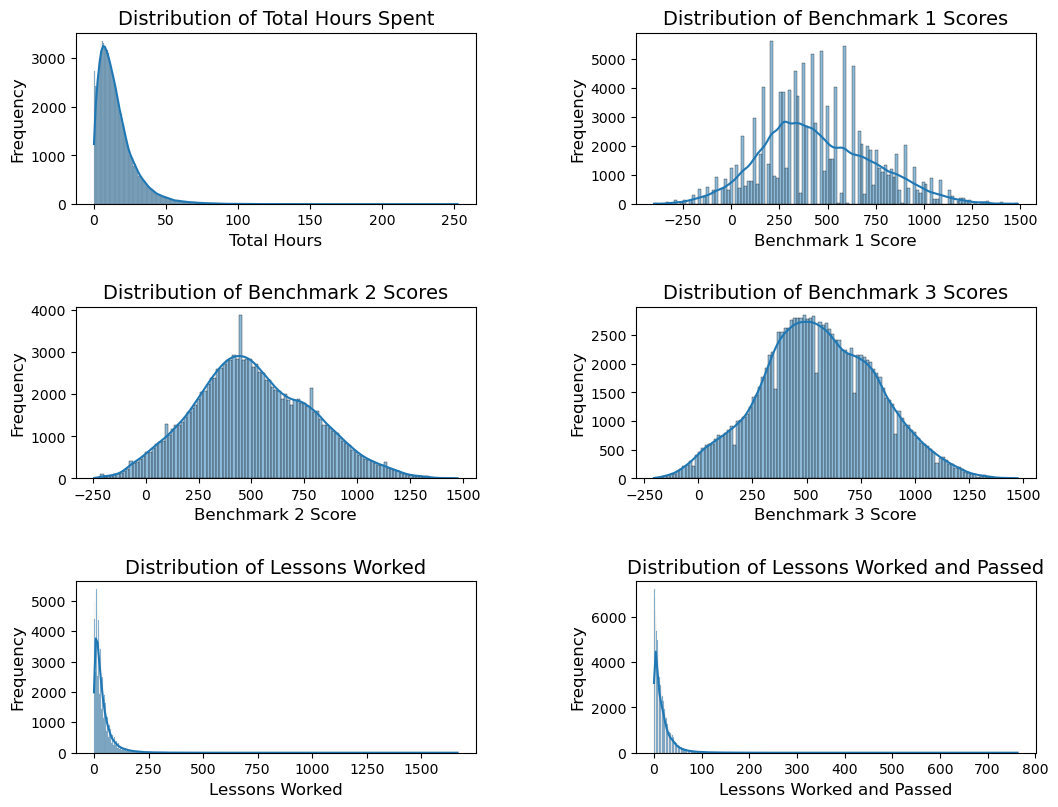

In [55]:
# set up the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

# plot each histogram on a separate subplot
sns.histplot(data=student_asses_use_data, x='total_hours', kde=True, ax=axs[0, 0])
sns.histplot(data=student_asses_use_data, x='Benchmark_1.rounded_quantile', kde=True, ax=axs[0, 1])
sns.histplot(data=student_asses_use_data, x='Benchmark_2.rounded_quantile', kde=True, ax=axs[1, 0])
sns.histplot(data=student_asses_use_data, x='Benchmark_3.rounded_quantile', kde=True, ax=axs[1, 1])
sns.histplot(data=student_asses_use_data, x='lessons_worked', kde=True, ax=axs[2, 0])
sns.histplot(data=student_asses_use_data, x='lessons_worked_passed', kde=True, ax=axs[2, 1])

# add axis labels and titles
axs[0, 0].set_xlabel('Total Hours', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)
axs[0, 0].set_title('Distribution of Total Hours Spent', fontsize=14)

axs[0, 1].set_xlabel('Benchmark 1 Score', fontsize=12)
axs[0, 1].set_ylabel('Frequency', fontsize=12)
axs[0, 1].set_title('Distribution of Benchmark 1 Scores', fontsize=14)

axs[1, 0].set_xlabel('Benchmark 2 Score', fontsize=12)
axs[1, 0].set_ylabel('Frequency', fontsize=12)
axs[1, 0].set_title('Distribution of Benchmark 2 Scores', fontsize=14)

axs[1, 1].set_xlabel('Benchmark 3 Score', fontsize=12)
axs[1, 1].set_ylabel('Frequency', fontsize=12)
axs[1, 1].set_title('Distribution of Benchmark 3 Scores', fontsize=14)

axs[2, 0].set_xlabel('Lessons Worked', fontsize=12)
axs[2, 0].set_ylabel('Frequency', fontsize=12)
axs[2, 0].set_title('Distribution of Lessons Worked', fontsize=14)

axs[2, 1].set_xlabel('Lessons Worked and Passed', fontsize=12)
axs[2, 1].set_ylabel('Frequency', fontsize=12)
axs[2, 1].set_title('Distribution of Lessons Worked and Passed', fontsize=14)

# adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)




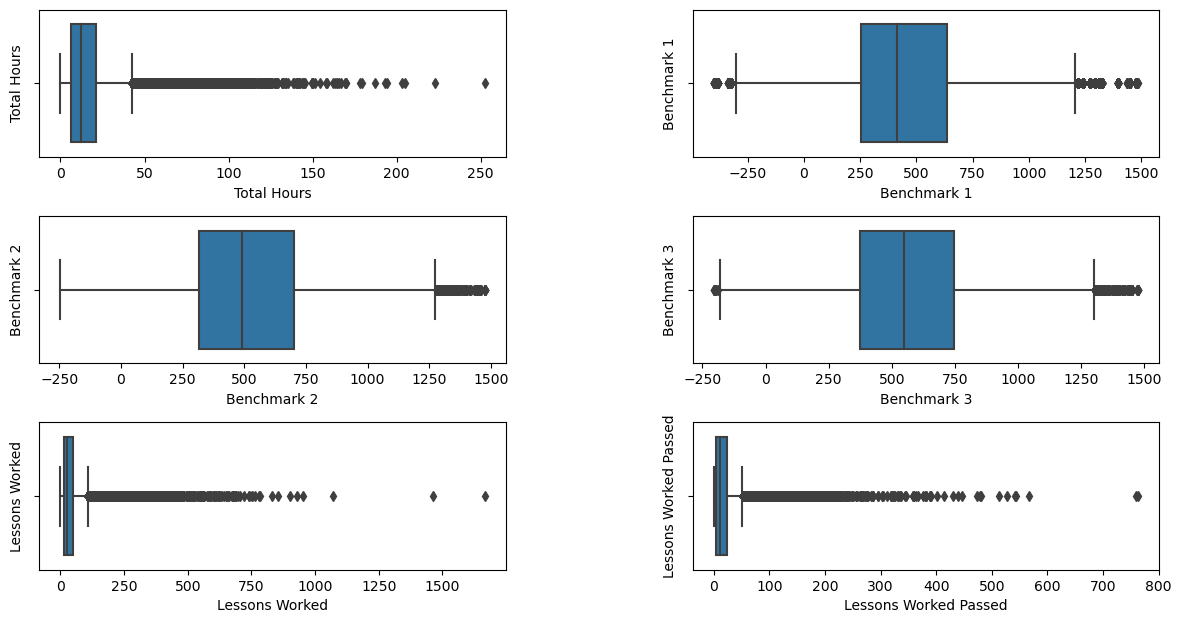

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 7))

# plot each boxplot on a separate subplot
sns.boxplot(data=student_asses_use_data, x='total_hours', ax=axes[0, 0])
sns.boxplot(data=student_asses_use_data, x='Benchmark_1.rounded_quantile', ax=axes[0, 1])
sns.boxplot(data=student_asses_use_data, x='Benchmark_2.rounded_quantile', ax=axes[1, 0])
sns.boxplot(data=student_asses_use_data, x='Benchmark_3.rounded_quantile', ax=axes[1, 1])
sns.boxplot(data=student_asses_use_data, x='lessons_worked', ax=axes[2, 0])
sns.boxplot(data=student_asses_use_data, x='lessons_worked_passed', ax=axes[2, 1])

# Adjust the axis labels
axes[0, 0].set_xlabel('Total Hours', fontsize=10)
axes[0, 1].set_xlabel('Benchmark 1', fontsize=10)
axes[1, 0].set_xlabel('Benchmark 2', fontsize=10)
axes[1, 1].set_xlabel('Benchmark 3', fontsize=10)
axes[2, 0].set_xlabel('Lessons Worked', fontsize=10)
axes[2, 1].set_xlabel('Lessons Worked Passed', fontsize=10)

axes[0, 0].set_ylabel('Total Hours', fontsize=10)
axes[0, 1].set_ylabel('Benchmark 1', fontsize=10)
axes[1, 0].set_ylabel('Benchmark 2', fontsize=10)
axes[1, 1].set_ylabel('Benchmark 3', fontsize=10)
axes[2, 0].set_ylabel('Lessons Worked', fontsize=10)
axes[2, 1].set_ylabel('Lessons Worked Passed', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.show()


Based on the histograms, we can observe that the data for Distribution of Total Study Hours, 'lessons_worked', and 'lessons_worked_passed' is positively skewed. This is evident from the fact that the tail of the distribution is longer on the right side of the peak.

Based on the box plots it is evident that presence of any outliers.

Not knowing the reasons for the outliers and whether they are genuine values or measurement errors. Assuming that the outliers are genuine values and proceeding with the analysis and also further investigating the data about the outliers.

In [57]:
# checking the students who lessons_worked_passed > q3+1.5IQR
# Finding outliers using Q1 = data['column'].quantile(0.25)
Q1 = student_asses_use_data['lessons_worked_passed'].quantile(0.25)
Q3 = student_asses_use_data['lessons_worked_passed'].quantile(0.75)
IQR = Q3 - Q1
outlier_data = student_asses_use_data[(student_asses_use_data['lessons_worked_passed'] >= Q3 + 1.5*IQR)]
# print(Q3 + 1.5*IQR)

In [58]:
#checking the information about the outlier data
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7617 entries, 530 to 127353
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   internal_student_id           7617 non-null   int64  
 1   grade_level_number            7617 non-null   int64  
 2   Benchmark_1.rounded_quantile  7617 non-null   int64  
 3   Benchmark_2.rounded_quantile  7617 non-null   int64  
 4   Benchmark_3.rounded_quantile  7617 non-null   int64  
 5   total_hours                   7617 non-null   float64
 6   total_evening_hours           7617 non-null   float64
 7   problems_solved               7617 non-null   int64  
 8   problems_passed               7617 non-null   int64  
 9   points_awarded                7617 non-null   int64  
 10  hints_viewed                  7617 non-null   int64  
 11  live_help_count               7617 non-null   int64  
 12  lessons_hit                   7617 non-null   float64
 13 

- There are 7617 students who lessons_worked_passed are more than 52 but this may vary for each grade( need to analyse for each grade)

Based on the information provided, assuming that students who have passed 30 or more math lessons during a school year are actively using the math program. We can divide the dataset into two groups, one with students who have passed 30 or more math lessons, and another with students who have passed less than 30 math lessons. 

In [59]:
# Create a new column to indicate if a student passed more or less than 30 lessons
# If a student passed less than 30 lessons, they are classified as "Non active users"
# If a student passed 30 or more lessons, they are classified as "Active users"
student_asses_use_data['math_users'] = student_asses_use_data['lessons_worked_passed'].apply(lambda x: 'Non active users' if x < 30 else 'Active users')

#The code is using the ".apply()" method to apply a lambda function to each value in the "lessons_worked_passed" 
#column. The lambda function checks whether the value is less than 30. If it is, the lambda function returns the string 'Non active users'. If it is greater than or equal to 30, the lambda function returns the string 'Active users'.
#The ".apply()" method then assigns the resulting values from the lambda function to the "math_users" 
#column for each row in the dataframe.

In [60]:
#checking the information of the data after adding new colimn
student_asses_use_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127285 entries, 0 to 127355
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   internal_student_id           127285 non-null  int64  
 1   grade_level_number            127285 non-null  int64  
 2   Benchmark_1.rounded_quantile  127285 non-null  int64  
 3   Benchmark_2.rounded_quantile  127285 non-null  int64  
 4   Benchmark_3.rounded_quantile  127285 non-null  int64  
 5   total_hours                   127285 non-null  float64
 6   total_evening_hours           127285 non-null  float64
 7   problems_solved               127285 non-null  int64  
 8   problems_passed               127285 non-null  int64  
 9   points_awarded                127285 non-null  int64  
 10  hints_viewed                  127285 non-null  int64  
 11  live_help_count               127285 non-null  int64  
 12  lessons_hit                   127285 non-nul

In [62]:
#Counting the number of students in each group of math_users

student_asses_use_data.math_users.value_counts()

Non active users    104688
Active users         22597
Name: math_users, dtype: int64

In [63]:
#checking the total students in each group and each grade
# Count the number of students in each grade level and  math user group
total_students = student_asses_use_data[['grade_level_number', 'math_users']].value_counts().reset_index()
# Rename the columns to match the expected output format
total_students.columns = ['grade_level_number', 'math_users', 'count']

#pivot the dataframe to transpose the columns for active and non-active users
df_student_count = total_students.pivot(index='grade_level_number', columns='math_users', values='count')

In [64]:
# printing the count of  students bty each grade
df_student_count

math_users,Active users,Non active users
grade_level_number,,
2,1140,11953
3,7225,18311
4,6207,18455
5,4607,17639
6,2342,12371
7,511,11385
8,367,9723
9,179,4760
10,19,91


#### Observations:
- From the above non active students are more than the active students in each Grade Level

In [65]:
#For analysing influence of Math Program on student outcomes based on the quantile growth 
#Keeping only required columns required for analysis 
cols = ['internal_student_id', 'grade_level_number',
       'Benchmark_1.rounded_quantile', 'Benchmark_2.rounded_quantile',
       'Benchmark_3.rounded_quantile', 'total_hours', 'lessons_worked_passed', 'math_users']
new_df = student_asses_use_data[cols].copy()
#.copy() method is used to avoid modifying the original dataframe.

In [66]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127285 entries, 0 to 127355
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   internal_student_id           127285 non-null  int64  
 1   grade_level_number            127285 non-null  int64  
 2   Benchmark_1.rounded_quantile  127285 non-null  int64  
 3   Benchmark_2.rounded_quantile  127285 non-null  int64  
 4   Benchmark_3.rounded_quantile  127285 non-null  int64  
 5   total_hours                   127285 non-null  float64
 6   lessons_worked_passed         127285 non-null  float64
 7   math_users                    127285 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 12.8+ MB


- For further analysis, we will take a sample from the above data because there is a large difference in the number of active and non-active users. Specifically, there are 22,597 active users and 104,675 non-active users.

Selecting a random sample from each group, ensuring that both active and non-active users are represented in the final sample

In [67]:

# create an empty dataframe to store the sample
sample = pd.DataFrame(columns=new_df.columns)

# loop through each grade level
for grade_level in new_df['grade_level_number'].unique():
    # group the students by active status
    grouped = new_df.loc[new_df['grade_level_number'] == grade_level].groupby('math_users')
    
    # determine the minimum number of active and non-active users
    min_active = grouped.size().min()
    min_non_active = grouped.size().min()
    
    # select a random sample of the minimum number of active and non-active users
    for user_type, group in grouped:
        if user_type == 'Active_users':
            sample_group = group.sample(min_active, random_state=42)
        else:
            sample_group = group.sample(min_non_active, random_state=42)
        
        # add the selected sample to the sample dataframe
        sample = sample.append(sample_group)
        
# print the number of students in the sample
print('Number of students in the sample:', len(sample))


Number of students in the sample: 45194


In [68]:
# showing the distribution of active and non-active users across each grade level in the selected sample.
sample[['grade_level_number','math_users']].value_counts().reset_index()

,grade_level_number,math_users,0
0,3,Active users,7225
1,3,Non active users,7225
2,4,Active users,6207
3,4,Non active users,6207
4,5,Active users,4607
5,5,Non active users,4607
6,6,Non active users,2342
7,6,Active users,2342
8,2,Non active users,1140
9,2,Active users,1140


In [69]:
#checking the information of sample data
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 91968 to 78674
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   internal_student_id           45194 non-null  object 
 1   grade_level_number            45194 non-null  object 
 2   Benchmark_1.rounded_quantile  45194 non-null  object 
 3   Benchmark_2.rounded_quantile  45194 non-null  object 
 4   Benchmark_3.rounded_quantile  45194 non-null  object 
 5   total_hours                   45194 non-null  float64
 6   lessons_worked_passed         45194 non-null  float64
 7   math_users                    45194 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.1+ MB


From the above the data types ofinternal_student_id','Benchmark_1.rounded_quantile','Benchmark_2.rounded_quantile','Benchmark_3.rounded_quantile' have chnged after sampling 

In [70]:
columns = ['internal_student_id', 'Benchmark_1.rounded_quantile', 'Benchmark_2.rounded_quantile', 'Benchmark_3.rounded_quantile']
#converting the selected columns in the sample dataframe from their current data type to numeric data type using the pd.to_numeric() function
for i in columns:
    sample[i] = pd.to_numeric(sample[i])
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 91968 to 78674
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   internal_student_id           45194 non-null  int64  
 1   grade_level_number            45194 non-null  object 
 2   Benchmark_1.rounded_quantile  45194 non-null  int64  
 3   Benchmark_2.rounded_quantile  45194 non-null  int64  
 4   Benchmark_3.rounded_quantile  45194 non-null  int64  
 5   total_hours                   45194 non-null  float64
 6   lessons_worked_passed         45194 non-null  float64
 7   math_users                    45194 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 3.1+ MB


In [71]:
#Counting the number of students in the sample by each group of math_users

sample.math_users.value_counts()

Active users        22597
Non active users    22597
Name: math_users, dtype: int64

In [72]:
#Group the data by user_status and calculate the average of rounded_quantile
users_group = sample.groupby('math_users')\
[['Benchmark_1.rounded_quantile','Benchmark_2.rounded_quantile','Benchmark_3.rounded_quantile']].mean().sort_values(by ='Benchmark_3.rounded_quantile',ascending=True)

In [73]:
users_group

,Benchmark_1.rounded_quantile,Benchmark_2.rounded_quantile,Benchmark_3.rounded_quantile
math_users,,,
Non active users,349.759924,420.699872,479.027747
Active users,464.513431,565.425941,642.464044


In [74]:
#Renaming the columns 
users_group = users_group.rename(columns={'Benchmark_1.rounded_quantile': 'Benchmark1_Quantile',\
                                          'Benchmark_2.rounded_quantile': 'Benchmark2_Quantile','Benchmark_3.rounded_quantile': 'Benchmark3_Quantile'})

In [75]:
users_group

,Benchmark1_Quantile,Benchmark2_Quantile,Benchmark3_Quantile
math_users,,,
Non active users,349.759924,420.699872,479.027747
Active users,464.513431,565.425941,642.464044


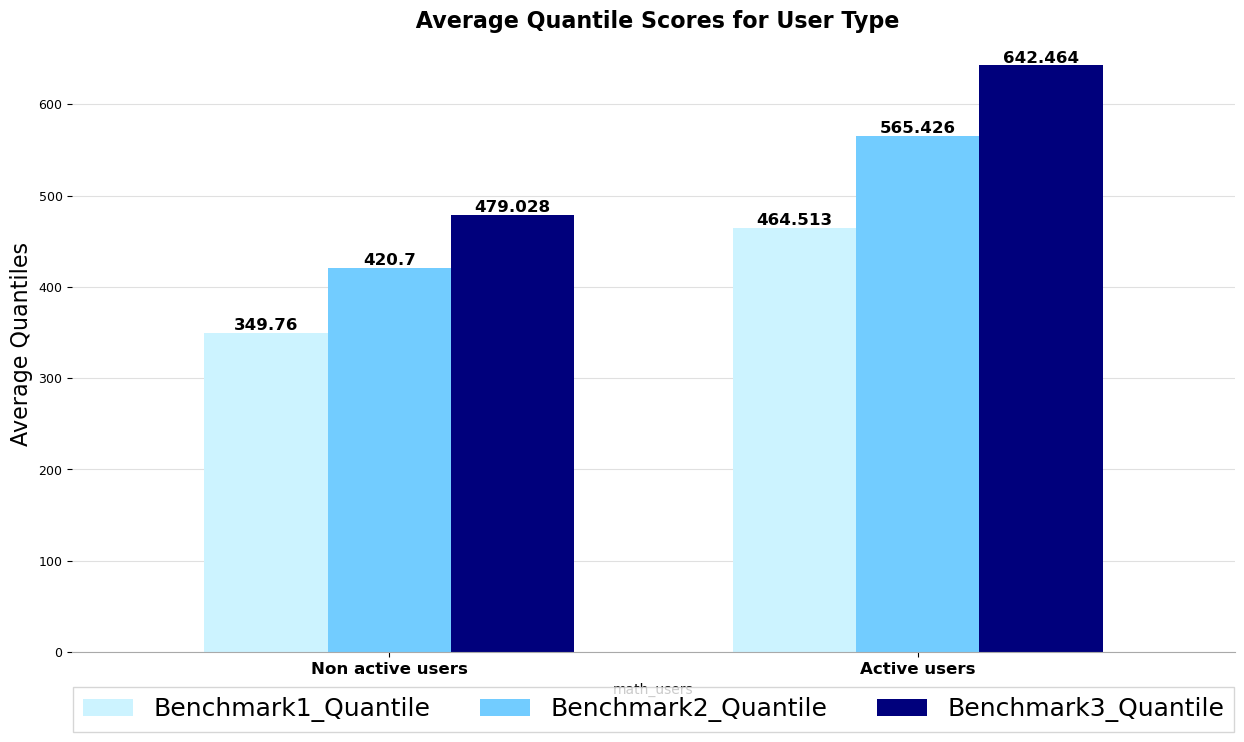

In [76]:
#Create a bar plot with the data in users_group DataFrame
# Set the figure size, colors, and width of the bars
ax = users_group.plot(kind="bar", figsize=(15, 8), color=['#ccf3ff', '#72ccff', '#00007C'],width=0.7)

# set plot attributes
ax.set_title(" Average Quantile Scores for User Type", loc="center", fontsize=16,fontweight='bold')
ax.set_ylabel("Average Quantiles", fontsize=16)

# Add labels to each bar with the edge label type and font size
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12,fontweight='bold')
    
# Set the x-axis and y axis tick labels rotation and font size  
plt.xticks(rotation=0,fontsize=12,fontweight='bold')
plt.yticks(fontsize=9)
ax.set_facecolor('white')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_visible(False)
ax.grid(which='both', axis='y', color='lightgrey', linestyle='-', alpha=0.7)
ax.set_axisbelow(True)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=3, fontsize=18)
plt.show()


- From the above graph it is clear that there is a increase in quantile score of active users by  the end of Benchmark3 Test

In [77]:
# Group the Sample DataFrame by grade level and user type
#The mean of the three benchmark scores is calculated for each group of students 
user_group_grade = round(sample.groupby(['grade_level_number', 'math_users'])\
[['Benchmark_1.rounded_quantile', 'Benchmark_2.rounded_quantile', 'Benchmark_3.rounded_quantile']].mean(),2).reset_index()

In [78]:
user_group_grade 

,grade_level_number,math_users,Benchmark_1.rounded_quantile,Benchmark_2.rounded_quantile,Benchmark_3.rounded_quantile
0,2,Active users,271.90,313.08,381.72
1,2,Non active users,150.11,187.45,243.21
2,3,Active users,290.71,409.68,501.33
3,3,Non active users,196.08,282.66,356.51
4,4,Active users,414.01,543.51,635.41
5,4,Non active users,320.12,409.68,474.37
6,5,Active users,633.19,706.83,763.31
7,5,Non active users,482.39,537.64,585.71
8,6,Active users,691.88,773.96,836.04
9,6,Non active users,558.35,605.36,642.48


In [79]:
#creating a new column called 'quantile_growth' in the dataframe 'user_group_grade', which represents the growth of the student's score between the initial assessment (Benchmark 1) and the final assessment (Benchmark 3).
user_group_grade['quantile_growth'] = user_group_grade['Benchmark_3.rounded_quantile'] - user_group_grade['Benchmark_1.rounded_quantile']

#Printing the data frame
user_group_grade

,grade_level_number,math_users,Benchmark_1.rounded_quantile,Benchmark_2.rounded_quantile,Benchmark_3.rounded_quantile,quantile_growth
0,2,Active users,271.90,313.08,381.72,109.82
1,2,Non active users,150.11,187.45,243.21,93.10
2,3,Active users,290.71,409.68,501.33,210.62
3,3,Non active users,196.08,282.66,356.51,160.43
4,4,Active users,414.01,543.51,635.41,221.40
5,4,Non active users,320.12,409.68,474.37,154.25
6,5,Active users,633.19,706.83,763.31,130.12
7,5,Non active users,482.39,537.64,585.71,103.32
8,6,Active users,691.88,773.96,836.04,144.16
9,6,Non active users,558.35,605.36,642.48,84.13


In [80]:
#creating a new column in the user_group_grade dataframe called mean_score. 
#This column is computed by taking the mean of the values in columns 'Benchmark_1.rounded_quantile', 'Benchmark_2.rounded_quantile', and 'Benchmark_3.rounded_quantile' using the .mean()
    
user_group_grade['mean_score'] = round(user_group_grade[['Benchmark_1.rounded_quantile', 'Benchmark_2.rounded_quantile', 'Benchmark_3.rounded_quantile']].mean(axis=1),2)

In [81]:

#sorts the dataframe user_group_grade in place based on two columns: grade_level_number in ascending order and math_users in descending order.

# This sorting in a specific order that can be used to display the non-active users group in the first place on a graph.
user_group_grade.sort_values(by=['grade_level_number','math_users'],ascending=[True,False],inplace=True)

# printing the data
user_group_grade

,grade_level_number,math_users,Benchmark_1.rounded_quantile,Benchmark_2.rounded_quantile,Benchmark_3.rounded_quantile,quantile_growth,mean_score
1,2,Non active users,150.11,187.45,243.21,93.10,193.59
0,2,Active users,271.90,313.08,381.72,109.82,322.23
3,3,Non active users,196.08,282.66,356.51,160.43,278.42
2,3,Active users,290.71,409.68,501.33,210.62,400.57
5,4,Non active users,320.12,409.68,474.37,154.25,401.39
4,4,Active users,414.01,543.51,635.41,221.40,530.98
7,5,Non active users,482.39,537.64,585.71,103.32,535.25
6,5,Active users,633.19,706.83,763.31,130.12,701.11
9,6,Non active users,558.35,605.36,642.48,84.13,602.06
8,6,Active users,691.88,773.96,836.04,144.16,767.29


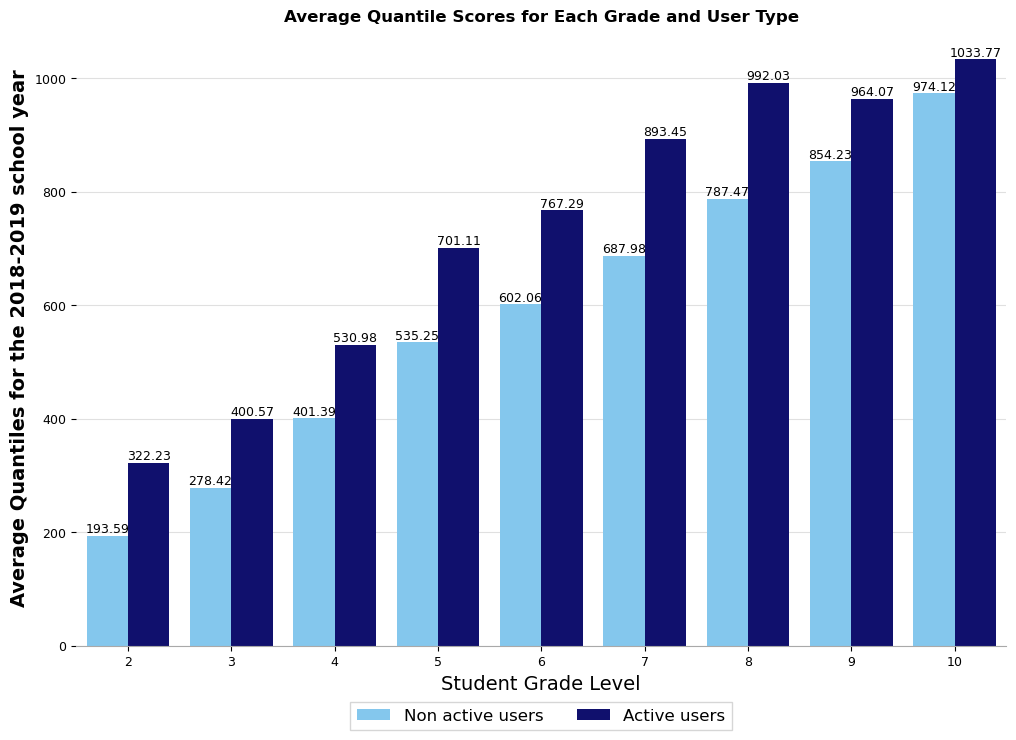

In [83]:
# plot the bar chart using seaborn
plt.figure(figsize=(12,8))
ax =sns.barplot(data = user_group_grade, x='grade_level_number', y='mean_score', hue='math_users', palette=['#72ccff','#00007C'])

# set plot attributes
ax.set_title("Average Quantile Scores for Each Grade and User Type", fontsize=12,fontweight='bold')
ax.set_xlabel("Student Grade Level", fontsize=14)
ax.set_ylabel("Average Quantiles for the 2018-2019 school year", fontsize=14,fontweight='bold')

# Add labels to each bar with the edge label type and font size
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=9)
    
# adjust tick label font size
plt.xticks(rotation=0,fontsize=9)
plt.yticks(fontsize=9)
ax.set_facecolor('white')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_visible(False)
ax.grid(which='both', axis='y', color='lightgrey', linestyle='-', alpha=0.7)
ax.set_axisbelow(True)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=2, fontsize=12)
plt.show()


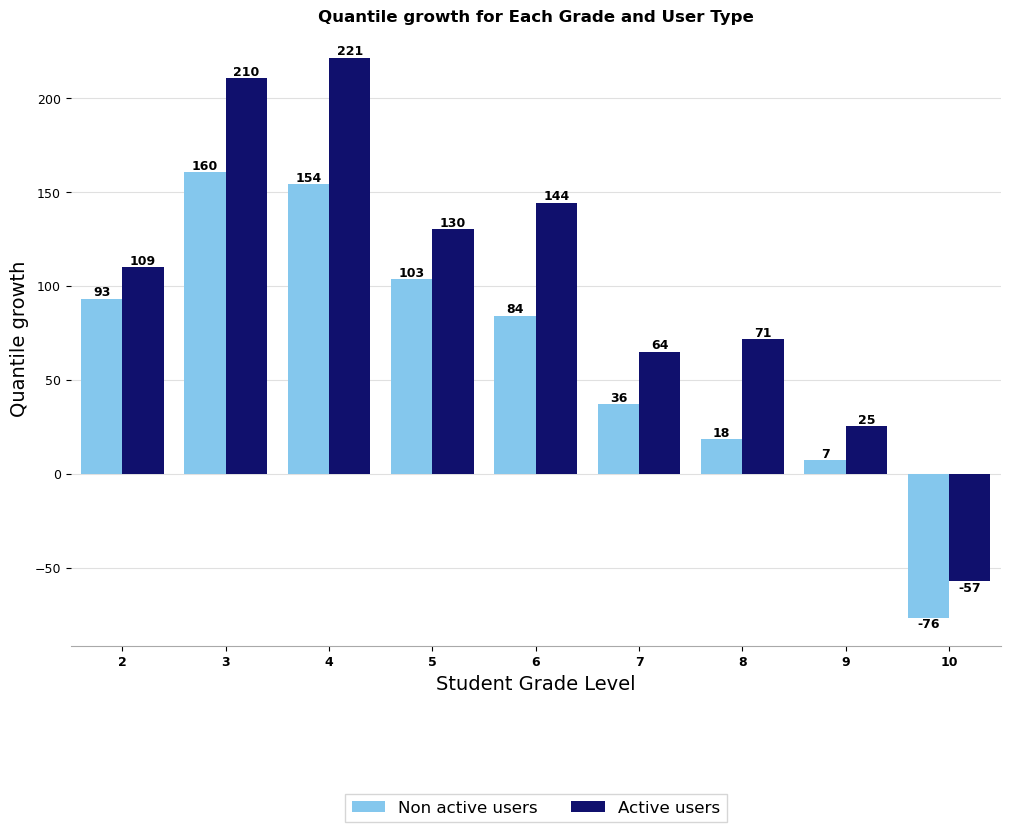

In [84]:
# plotting the bar chart using seaborn 
plt.figure(figsize=(12,8))
ax =sns.barplot(data = user_group_grade, x='grade_level_number', y='quantile_growth', hue='math_users', palette=['#72ccff','#00007C'])

# set plot attributes
ax.set_title("Quantile growth for Each Grade and User Type", fontsize=12,loc = 'center',fontweight='bold')
ax.set_xlabel("Student Grade Level", fontsize=14)
ax.set_ylabel("Quantile growth", fontsize=14)

# Add labels to each bar with the edge label type and font size
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=9,fontweight='bold',fmt='%d')
    
# adjust tick label font size
plt.xticks(rotation=0,fontsize=9,fontweight='bold')
plt.yticks(fontsize=9)
ax.set_facecolor('white')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_visible(False)
ax.grid(which='both', axis='y', color='lightgrey', linestyle='-', alpha=0.7)
ax.set_axisbelow(True)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), fancybox=False, shadow=False, ncol=2, fontsize=12)
plt.show()

#### Summary of the Findings
- The sample was randomly selected from the student assessment data to represent both active and non-active users.
- Active users tend to have a higher mean score and a higher growth in quantiles compared to non-active users.
- The active users tend to have a higher quantile growth compared to non-active users across all grade levels.
- The analysis suggests that increased engagement with  Math Program correlates with higher academic achievement.
- The sample sizes for grade levels 9 and 10 are quite small with only 179 and 19 students respectively. Therefore, it may not be appropriate to draw any conclusions about the quantile growth for these grade levels based on this limited sample size.
- However, it's important to note that these observations are based on graphical analysis only and should be further verified by performing statistical tests to determine the significance of these differences.

In [85]:
# This line of code creates a new data frame by copying "sample" dataframe
sample_test= sample.copy()

In [86]:
sample_test

,internal_student_id,grade_level_number,Benchmark_1.rounded_quantile,Benchmark_2.rounded_quantile,Benchmark_3.rounded_quantile,total_hours,lessons_worked_passed,math_users
91968,19893830,6,800,815,920,26.87,42.0,Active users
31068,19276874,6,670,740,835,24.07,44.0,Active users
16936,19039615,6,905,925,990,17.04,36.0,Active users
125234,20336504,6,950,840,960,46.98,72.0,Active users
106183,20058919,6,680,840,895,21.75,38.0,Active users
...,...,...,...,...,...,...,...,...
94856,19944310,2,35,125,120,9.26,8.0,Non active users
109735,20063634,2,45,70,195,17.01,8.0,Non active users
122478,20238788,2,45,180,335,5.42,4.0,Non active users
92447,19903947,2,170,455,435,2.04,1.0,Non active users


In [87]:
#calculating the Quantile growth and storing in the varaible
sample_test['Quantile_growth'] = sample_test['Benchmark_3.rounded_quantile']-sample_test['Benchmark_1.rounded_quantile']

Conducting Statistical tests to determine the significance of the difference between Quantile Grpowth of non active user group and active user group

Define the null hypothesis and alternative hypothesis.

<u> Null hypothesis</u>: The mean quantile growth of active users is equal to or less than the mean quantile growth of non-users

<u>Alternative hypothesis</u>: The mean quantile growth of active users is greater than the mean quantile growth of non-users

In [90]:
#Conducting test for whole sample data 

#Importing the required Libraries for performing Statistical Tests

from statsmodels.stats.weightstats import ztest

# Getting the Quantile growth of each group
active_users = sample_test[sample_test['math_users'] == 'Active users']['Quantile_growth']
non_active_users = sample_test[sample_test['math_users'] == 'Non active users']['Quantile_growth']

#  Assuming significance level to 0.05
alpha = 0.05

#conducting a one-tailed z-test to compare the mean quantile growth scores of active and non-active users

z_stat, p_value = ztest(active_users, non_active_users, value=0, alternative='larger')

# print the conclusion based on the p-value and z-statistic

if p_value < alpha and z_stat > 0:
    print("Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.")
else:
    print("Fail to reject the null hypothesis. The mean quantile growth of active users is equal to or less than the mean quantile growth of non-users.")

Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.


It can be concluded that, at a significance level of 0.05, the null hypothesis stating that the mean quantile growth of active users is equal to or less than the mean quantile growth of non-users is rejected. This suggests that the mean quantile growth of active users is significantly greater than that of non-users.

In [91]:
#Conducting the test for each Grade level students 

# Extracting the unique grades and sorting the the grades in ascending order
grades = np.sort(sample_test['grade_level_number'].unique())
print(grades)


# loop through each grade
for grade in grades:
    
# extract the quantile growth for active and non-active users in the current grade
    active_users = sample_test[(sample_test['math_users'] == 'Active users') & (sample_test['grade_level_number'] == grade)]['Quantile_growth']
    non_active_users = sample_test[(sample_test['math_users'] == 'Non active users') & (sample_test['grade_level_number'] == grade)]['Quantile_growth']
    
# Assuming significance level to 0.05
    alpha = 0.05
       
# conducting a one-tailed z-test to compare the mean quantile growth scores of active and non-active users in the current grade
    z_stat, p_value = ztest(active_users, non_active_users, value=0,alternative='larger')
    print(round(z_stat,2),round(p_value,2))
    
# print the conclusion based on the p-value and z-statistic
    
    if p_value < alpha and z_stat > 0:
        print("Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.")
    else:
        print("Fail to reject the null hypothesis. The mean quantile growth of active users is equal to or less than the mean quantile growth of non-users")

[2 3 4 5 6 7 8 9 10]
2.91 0.0
Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.
24.2 0.0
Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.
29.87 0.0
Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.
10.85 0.0
Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.
17.08 0.0
Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.
3.81 0.0
Reject the null hypothesis. The mean quantile growth of active users is significantly greater than the mean quantile growth of non-users.
5.91 0.0
Reject the null hypothesis. The mean quantile growth of active users is significantly

#### Observations:
- For grades 2 to 8, we reject the null hypothesis that the mean quantile growth of active users is equal to or less than the mean quantile growth of non-users. This means that for these grades, the active users have a significantly higher quantile growth compared to the non-users.

- For grades 9 and 10, we fail to reject the null hypothesis. This means that for these grades, there is not enough evidence to support the claim that the mean quantile growth of active users is significantly different from the mean quantile growth of non-users.

- It is possible that the small sample size of 19 for each group in the 10th grade and 179 for each group in the 9th grade may not be large enough to prove that the mean quantile growth of active users is significantly greater than the mean quantile growth of non-users 


#### Conclusion:

- The Math program have a positive impact on the quantile growth of students in grades 2 to 8. 
- However, for grades 9 and 10, there is not enough evidence to support the claim that the program has a significant impact on quantile growth. 